# Plotting Skew-T from Arrays

### Import the PyADAPT package and Skew-T

In [1]:
import pyadapt
from pyadapt.extras import skewt

Import some other useful packages

In [2]:
%matplotlib inline
import os

## Import the Sounding File

For the purposes of this demo I will be using a netCDF file for the sounding data and passing it into the pyadapt `read` method which returns, among some other things, `data` which is a dictionary of the variables inside the file.

I will then show how to construct the plot manually, but this is admittedly not terribly user-friendly. I think a good way to go would be to make some sort of `skewt.plot_skewt` function that would do most of the manual stuff behind the scenes. Which, as it turns out, is what happens if you call `.plot()` on the SKEWT object returned by `pyadapt.read()`. I'll show you.

In [3]:
# let's get a sounding to play with
ncfile = os.path.join('data', 'grwsondewnpnM1.b1.20090630.232900.cdf')

SKEWT = pyadapt.read(ncfile)
print(dir(SKEWT))
print(SKEWT.keys)
print(SKEWT.data['pres'])
print(SKEWT.data['tdry'])

['__doc__', '__init__', '__module__', 'comment', 'data', 'dimensions', 'file_datetime', 'keys', 'kind', 'long_name', 'missing_value', 'plot', 'site_id', 'units']
[u'base_time', u'time_offset', u'time', u'qc_time', u'pres', u'qc_pres', u'tdry', u'qc_tdry', u'dp', u'qc_dp', u'wspd', u'qc_wspd', u'deg', u'qc_deg', u'rh', u'qc_rh', u'u_wind', u'qc_u_wind', u'v_wind', u'qc_v_wind', u'wstat', u'asc', u'qc_asc', u'lat', u'lon', u'alt']
[ 1014.11999512  1013.04998779  1011.73999023 ...,    26.89999962
    26.86000061    26.80999947]
[ 18.37000084  18.45000076  18.39999962 ..., -48.66999817 -48.63000107
 -48.59000015]


## Construct the plot Manually

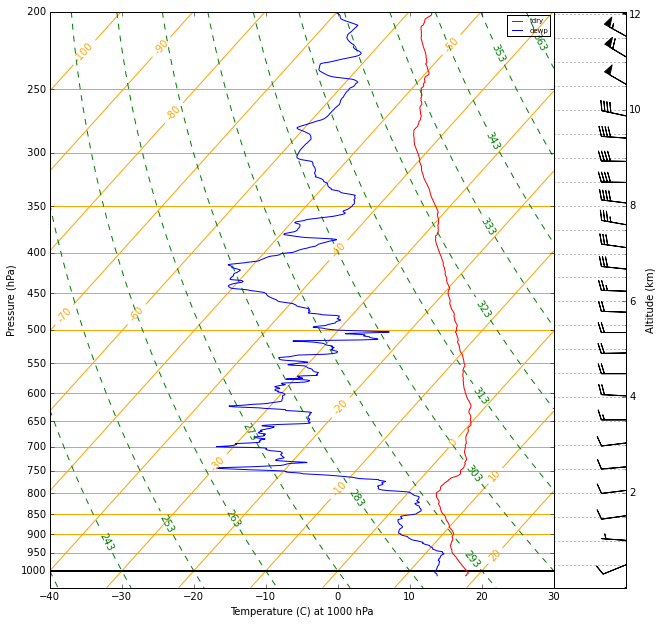

In [4]:
# construct the basic axes
fig, ax, bx = skewt.skewt_axes(ptop=200)

# plot the dry temperature
fig, ax = skewt.plot_profile(fig, ax, 
                             SKEWT.data['tdry'], 
                             SKEWT.data['pres'], 
                             label='tdry')

# plot the dewpoint temperature
fig, ax = skewt.plot_profile(fig, ax, 
                             SKEWT.data['dp'], 
                             SKEWT.data['pres'], 
                             c='b', label='dewp')

# add the winds for the altitude axis
fig, bx = skewt.plot_wind(fig, bx, 
                          mask=(SKEWT.data['pres'] >= 200),
                          u=SKEWT.data['u_wind'], 
                          v=SKEWT.data['v_wind'], 
                          a=SKEWT.data['alt'])

## Make the plot Automatically using .plot()

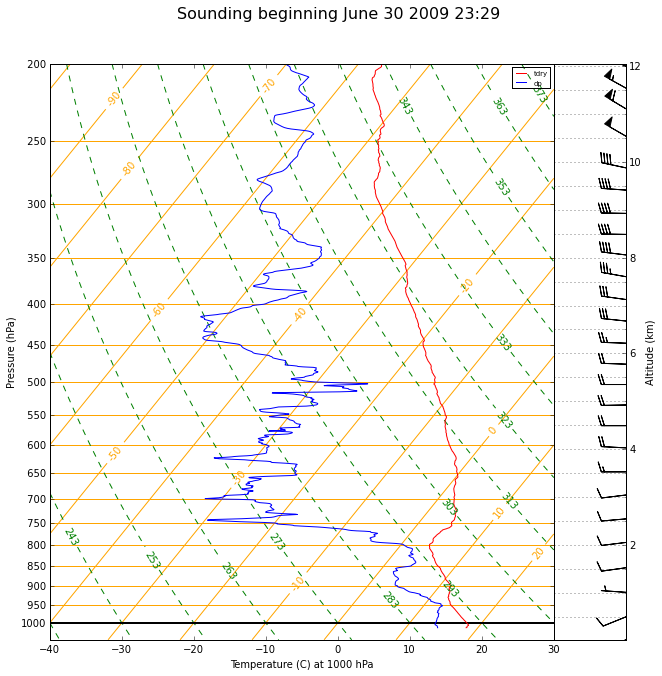

In [5]:
SKEWT.plot(ptop=200, pbot=1050, skew=90, tmin=-40, tmax=30)